### Assignment Part-I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. A regression model needs to built using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

<li>Significant variables in predicting the price of a house</li>
<li>How well those variables describe the price of a house</li>
<li>Determine the optimal value of lambda for ridge and lasso regression</li>


### Business Goal 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.





### Steps followed 

1. Data Understanding and Exploration 
    - univariate and bivariate
2. Data Cleaning 
    - Missing Value imputation 
    - Removing duplicates 
    - Outlier Treatment
    - Dummy Variables
3. Data Preparation 
4. Model building and Evaluation 
5. Observation


In [287]:
# imports and options
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [288]:
#sickit imports

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [289]:
### 1. Data Understanding and Exploration

In [290]:
src_train_df =  pd.read_csv('G://My Drive//Education//Master//artifacts//upgrad//advanced regression assignment//data//train.csv')
src_train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [291]:
src_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [292]:
print("The shape of the data")
print(src_train_df.shape)

print(f'Count of Empty Rows : {src_train_df.isnull().all(axis=1).sum()}')
print(f'Count of Empty Columns : {src_train_df.isnull().all(axis=0).sum()}')
print(f'Count of NAN Columns : {src_train_df.isna().all(axis=0).sum()}')


The shape of the data
(1460, 81)
Count of Empty Rows : 0
Count of Empty Columns : 0
Count of NAN Columns : 0


### Data Understanding and Exploration 

1. This data has 1460 rows 
2. Data consists of 81 columns
3. There are no empty rows and empty columns


In [293]:
# Assuming id is q unique column value,we can check if there are any duplicate rows

sum(src_train_df.duplicated(subset='Id'))==0

#review : No duplicates

True

In [294]:
#check for Outliers 

src_train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [295]:
#check for null %
null_percent = src_train_df.isnull().mean() * 100
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

###  Imputation process

In [296]:
null_per_df = pd.DataFrame(((src_train_df.isnull().sum()/len(src_train_df.index))*100).sort_values(ascending=False),columns=['percent'])
null_df=null_per_df[null_per_df['percent']>0]
print(f'Number of columns with null values :{null_df.shape[0]}')
print(f'Columns with null values :{null_df.index.to_list()}')

Number of columns with null values :19
Columns with null values :['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', 'Electrical']


In [297]:
null_df

,percent
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


In [298]:
# There are 4 columns with null values greater than 80%. hence, can be dropped 

print(f'Columns with null values > 80 before dropping :{src_train_df.columns}, Number of columns : {src_train_df.shape[1]}')
src_train_df = src_train_df.drop(null_df[null_df.percent>80].index.to_list(),axis=1)

#review : As the columns have > 80% null they can be dropped as they do not contribute to data analysis

Columns with null values > 80 before dropping :Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPor

In [299]:
print(f'Columns with null values > 80  after dropping :{src_train_df.columns}')
print(f' Number of columns after dropping : {src_train_df.shape[1]}')

Columns with null values > 80  after dropping :Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

In [300]:
null_df = null_df[null_df.percent<80]

In [301]:
null_df

,percent
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945
BsmtFinType2,2.602740
BsmtExposure,2.602740
BsmtQual,2.534247


In [302]:
src_train_df[null_df.index.to_list()].info()
#review : There are three columns which are numeric LotFrontage,GarageYrBlt  ,MasVnrArea    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FireplaceQu   770 non-null    object 
 1   LotFrontage   1201 non-null   float64
 2   GarageYrBlt   1379 non-null   float64
 3   GarageCond    1379 non-null   object 
 4   GarageType    1379 non-null   object 
 5   GarageFinish  1379 non-null   object 
 6   GarageQual    1379 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   BsmtExposure  1422 non-null   object 
 9   BsmtQual      1423 non-null   object 
 10  BsmtCond      1423 non-null   object 
 11  BsmtFinType1  1423 non-null   object 
 12  MasVnrArea    1452 non-null   float64
 13  MasVnrType    1452 non-null   object 
 14  Electrical    1459 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [303]:

# for all the Numerical values we replace the null values with median 
# for all the Categorical values we replace the null values with mode

print(f'Median Value of LotFrontage : {src_train_df["LotFrontage"].median()}')
print(src_train_df['LotFrontage'].describe())

print(f'Median Value of GarageYrBlt : {src_train_df["GarageYrBlt"].median()}')
src_train_df['GarageYrBlt'].describe()

print(f'Median Value of MasVnrArea : {src_train_df["MasVnrArea"].median()}')
print(src_train_df['MasVnrArea'].describe())



Median Value of LotFrontage : 69.0
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
Median Value of GarageYrBlt : 1980.0
Median Value of MasVnrArea : 0.0
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [304]:
numerical_column = src_train_df[null_df.index.to_list()].select_dtypes(exclude='object').columns.to_list()

In [305]:
#generic function to show median of the numerical column
def show_median(column):
    print(f'Median Value of the {column} : {src_train_df[column].median()}')
    print(src_train_df[column].describe())
    print()
    
[show_median(each_column) for each_column in numerical_column]

Median Value of the LotFrontage : 69.0
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Median Value of the GarageYrBlt : 1980.0
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Median Value of the MasVnrArea : 0.0
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64



[None, None, None]

In [306]:
#generic function to impute the numerical fields
def impute_median(src_train_df,column): 
    print(f"Before adding median value of na values in {column} : {src_train_df[column].isna().sum()}")
    print(f'{src_train_df[column].apply(lambda x: x ==src_train_df[column].median()).value_counts()}')
    src_train_df[column] = src_train_df[column].fillna(src_train_df[column].median())
    show_median(column)
    print(f"After adding median value of na values in {column} : {src_train_df[column].isna().sum()}")
    print(f'{src_train_df[column].apply(lambda x: x ==src_train_df[column].median()).value_counts()}')
    print()
    print()
    return src_train_df

for each in numerical_column:
    print(each)
    src_train_df = impute_median(src_train_df=src_train_df,column=each)

LotFrontage
Before adding median value of na values in LotFrontage : 259
False    1449
True       11
Name: LotFrontage, dtype: int64
Median Value of the LotFrontage : 69.0
count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

After adding median value of na values in LotFrontage : 0
False    1190
True      270
Name: LotFrontage, dtype: int64


GarageYrBlt
Before adding median value of na values in GarageYrBlt : 81
False    1445
True       15
Name: GarageYrBlt, dtype: int64
Median Value of the GarageYrBlt : 1980.0
count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

After adding median value of na values in GarageYrBlt : 0
False    1364
True       96
Name: GarageYrBlt, dtype: int64


MasVnrAre

In [307]:
src_train_df[numerical_column].describe()


,LotFrontage,GarageYrBlt,MasVnrArea
count,1460.000000,1460.000000,1460.000000
mean,69.863699,1978.589041,103.117123
std,22.027677,23.997022,180.731373
min,21.000000,1900.000000,0.000000
25%,60.000000,1962.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,79.000000,2001.000000,164.250000
max,313.000000,2010.000000,1600.000000


In [308]:
src_train_df.isnull().values.any()

True

In [309]:
#show categorical column in the data
categorical_column = src_train_df[null_df.index.to_list()].select_dtypes(include='object').columns.to_list()
print(categorical_column)

['FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical']


In [310]:
def print_mode(column):
    print(f'Mode Value of {column} : {src_train_df[column].mode()[0]}')
    print(src_train_df[column].describe())
    print()



def impute_mode(src_train_df,column):
    
    print(f"Before adding mode value of na values in {column} : {src_train_df[column].isna().sum()}")
    print(f'{src_train_df[column].apply(lambda x: x ==src_train_df[column].mode()[0]).value_counts()}')
    src_train_df[column] = src_train_df[column].fillna(src_train_df[column].mode()[0])
    print_mode(column)
    print(f"After adding mode value of na values in {column} : {src_train_df[column].isna().sum()}")
    print(f'{src_train_df[column].apply(lambda x: x ==src_train_df[column].mode()[0]).value_counts()}')
    print()
    print()
    return src_train_df

In [311]:
for each in categorical_column:
    print(each)
    src_train_df = impute_mode(src_train_df=src_train_df,column=each)

FireplaceQu
Before adding mode value of na values in FireplaceQu : 690
False    1080
True      380
Name: FireplaceQu, dtype: int64
Mode Value of FireplaceQu : Gd
count     1460
unique       5
top         Gd
freq      1070
Name: FireplaceQu, dtype: object

After adding mode value of na values in FireplaceQu : 0
True     1070
False     390
Name: FireplaceQu, dtype: int64


GarageCond
Before adding mode value of na values in GarageCond : 81
True     1326
False     134
Name: GarageCond, dtype: int64
Mode Value of GarageCond : TA
count     1460
unique       5
top         TA
freq      1407
Name: GarageCond, dtype: object

After adding mode value of na values in GarageCond : 0
True     1407
False      53
Name: GarageCond, dtype: int64


GarageType
Before adding mode value of na values in GarageType : 81
True     870
False    590
Name: GarageType, dtype: int64
Mode Value of GarageType : Attchd
count       1460
unique         6
top       Attchd
freq         951
Name: GarageType, dtype: object



In [312]:
src_train_df.isna().values.any()

False

In [313]:
#checking if any  more nulls
src_train_df.isna().sum()>0

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF   

###review
the data has no more null values from the info below.
The data now has 77 columns after imputation and elimination of the columns with more than 80% null values  

In [314]:
print(src_train_df.shape)
src_train_df.info()

(1460, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 1

### Outliers

 - outliers are data usually very distinct from the numerical range of  value for a given column 
 - There are multiple ways to detect the outliers 
     1) IQR Method 
     2) Z-value etc



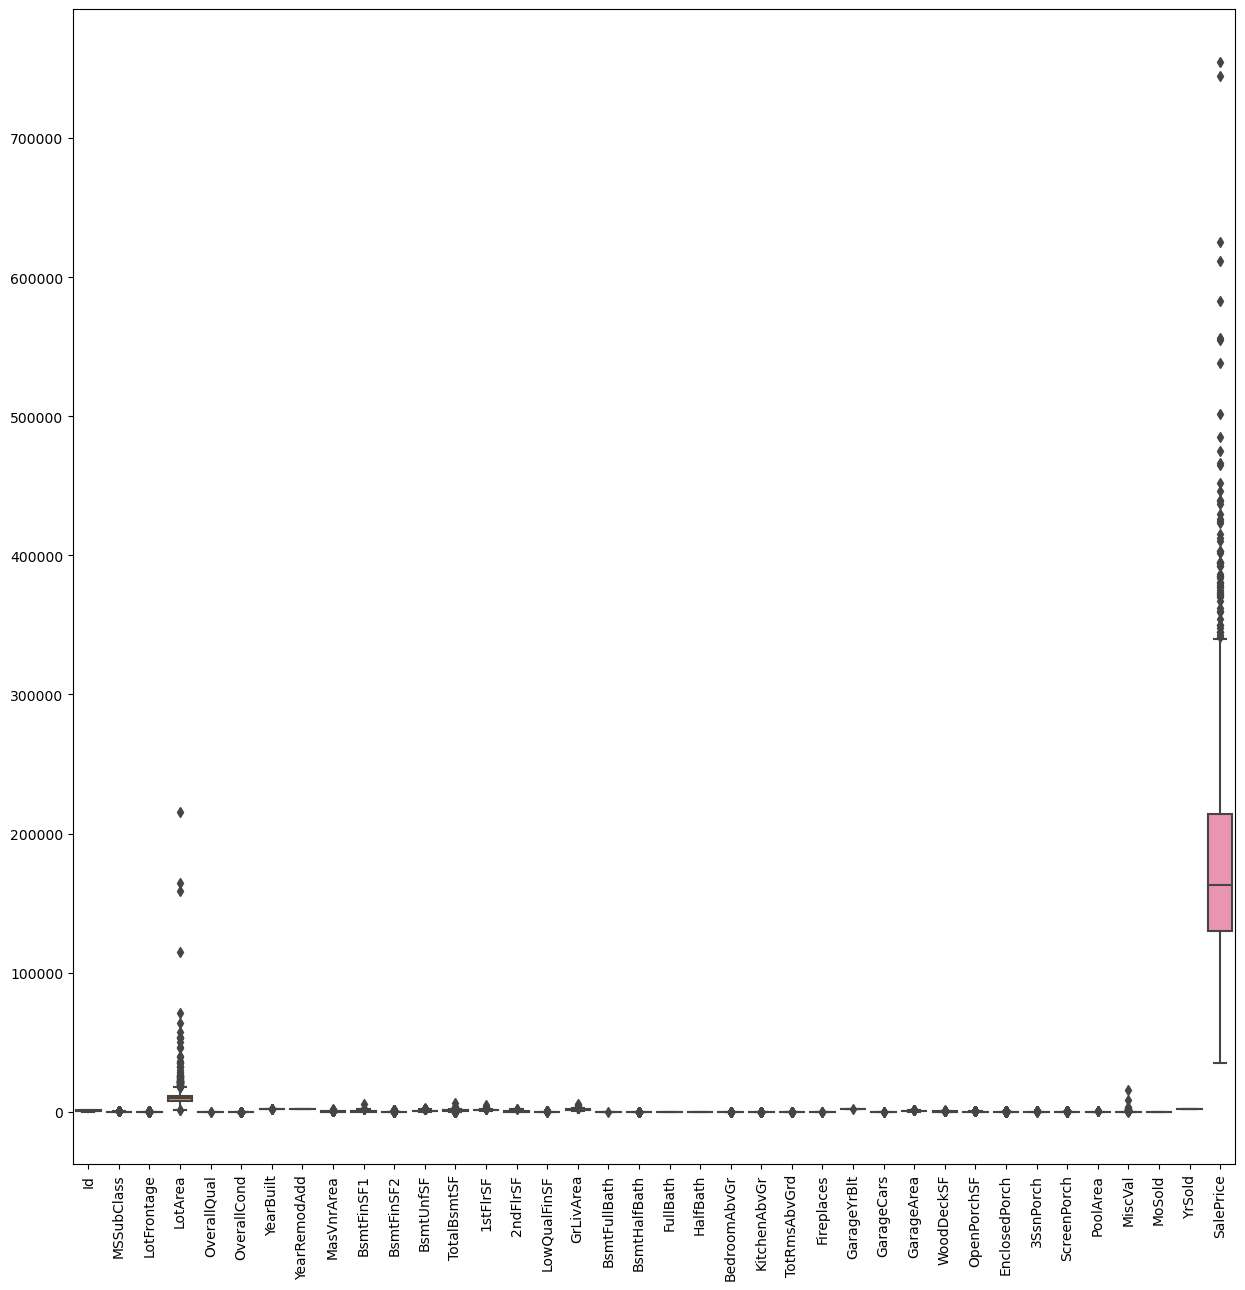

In [315]:
#Find out if data has outliers
src_train_df_numerical_columns = src_train_df.select_dtypes(exclude = 'object')

col_val = 1
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=src_train_df_numerical_columns);




In [316]:

for col in src_train_df_numerical_columns.columns:
    src_train_df_numerical_columns[col][src_train_df_numerical_columns[col] <= src_train_df_numerical_columns[col].quantile(0.05)] = src_train_df_numerical_columns[col].quantile(0.05)
    src_train_df_numerical_columns[col][src_train_df_numerical_columns[col] >= src_train_df_numerical_columns[col].quantile(0.95)] = src_train_df_numerical_columns[col].quantile(0.95)

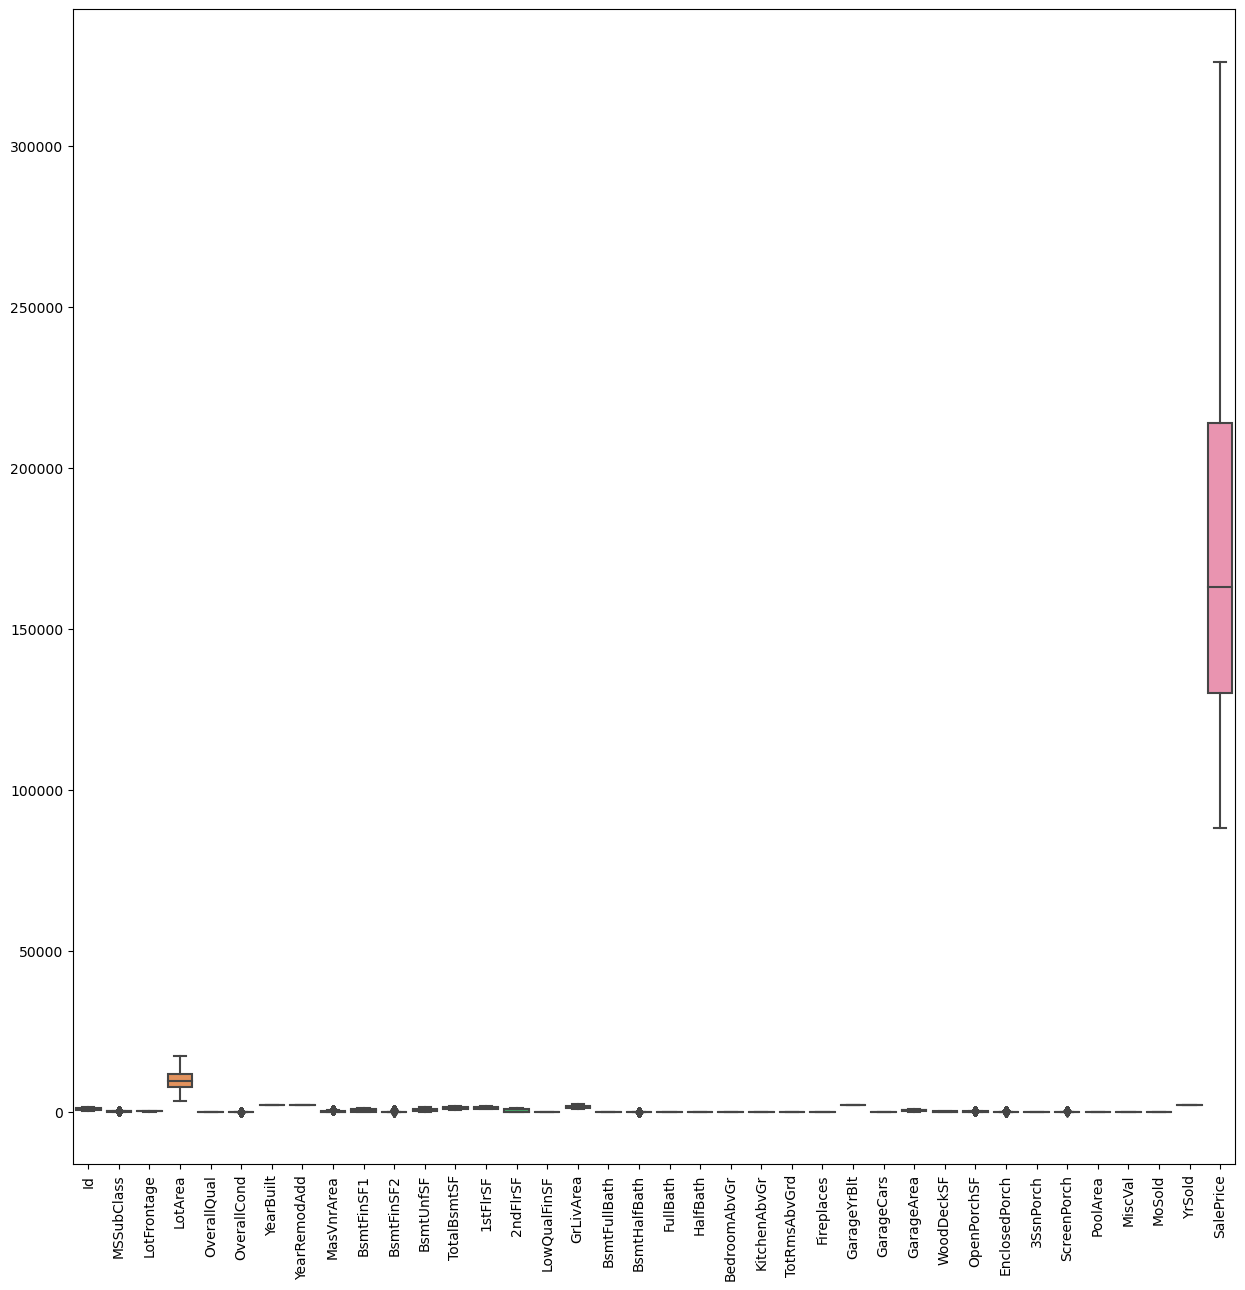

In [317]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=src_train_df_numerical_columns);


In [318]:
#drop Id as it's of no significance

src_train_df = src_train_df.drop(columns='Id',axis=1)

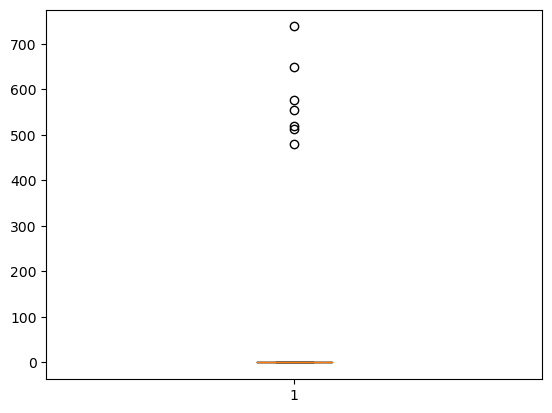

(1453, 76)

In [319]:
#SalesPrice is the Target column

plt.boxplot(src_train_df['PoolArea'])
plt.show()
q1 = src_train_df['PoolArea'].quantile(0.1)
q3 = src_train_df['PoolArea'].quantile(0.9)
IQR = q3 - q1
src_train_df = src_train_df[(src_train_df['PoolArea'] >= q1 - 1.5*IQR) & 
                      (src_train_df['PoolArea'] <= q3 + 1.5*IQR)]
src_train_df.shape


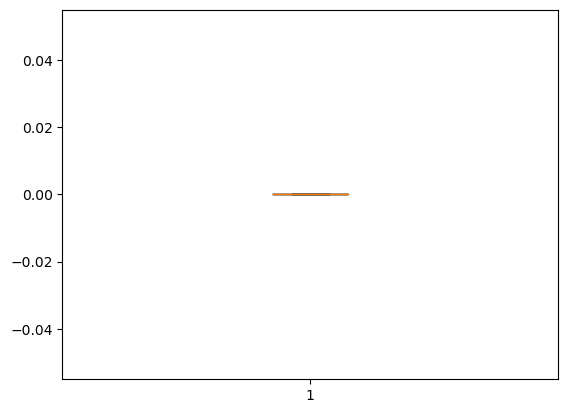

In [320]:
#AFter outlier removal
plt.boxplot(src_train_df['PoolArea'])
plt.show()

In [321]:
src_train_df_numerical_columns=src_train_df_numerical_columns.drop(columns='Id',axis=1)
src_train_df[src_train_df_numerical_columns.columns.to_list()].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.0,1453.000000,1453.000000,1453.000000,1453.000000
mean,56.871989,69.546456,10456.461115,6.092223,5.576050,1971.255334,1984.852030,102.871301,438.377839,46.064694,568.383345,1052.825877,1158.690984,344.264281,5.602891,1508.558156,0.422574,0.057123,1.562973,0.381968,2.862354,1.046800,6.507226,0.608396,1978.611838,1.766001,471.911218,93.708190,46.379904,21.679972,3.426015,14.830695,0.0,42.322092,6.328975,2007.821060,180404.663455
std,42.379778,20.821558,9893.690337,1.377616,1.113666,30.219699,20.672628,180.157684,433.587250,161.034273,442.313600,417.519539,374.575251,433.020585,47.672897,506.284263,0.517290,0.238017,0.548908,0.502752,0.814161,0.220845,1.612446,0.640773,23.982792,0.748019,212.484343,124.757048,65.859994,59.648986,29.386956,54.758790,0.0,494.650558,2.700978,1.327676,78168.872519
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7535.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,224.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,328.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9453.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,381.000000,0.000000,480.000000,990.000000,1086.000000,0.000000,0.000000,1459.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,479.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000,162900.000000
75%,70.000000,79.000000,11584.000000,7.000000,6.000000,2000.000000,2004.000000,164.000000,708.000000,0.000000,810.000000,1296.000000,1390.000000,728.000000,0.000000,1775.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000,213500.000000
90%,120.000000,92.000000,14254.000000,8.000000,7.000000,2006.000000,2006.000000,334.600000,1064.800000,109.600000,1232.000000,1601.600000,1679.800000,940.800000,0.000000,2148.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,753.800000,261.000000,130.000000,112.000000,0.000000,0.000000,0.0,0.000000,10.000000,2010.000000,277900.000000
95%,160.000000,103.000000,17128.000000,8.000000,8.000000,2007.000000,2007.000000,453.600000,1264.600000,393.000000,1468.000000,1748.400000,1826.800000,1136.400000,0.000000,2450.800000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,847.600000,333.800000,172.800000,180.000000,0.000000,160.000000,0.0,0.000000,11.000000,2010.000000,325774.400000
99%,190.000000,131.920000,36115.200000,10.000000,9.000000,2009.000000,2009.000000,779.680000,1567.000000,831.640000,1797.400000,2136.000000,2201.280000,139

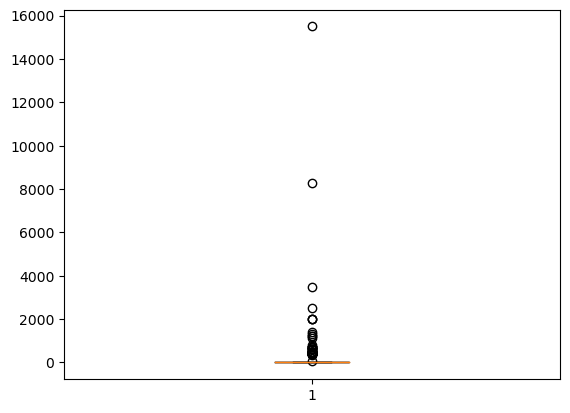

After Outlier removal


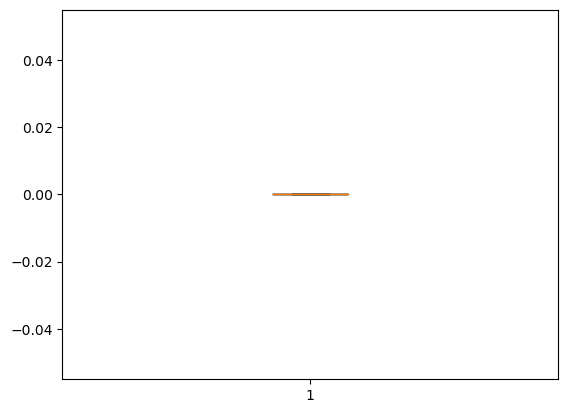

In [322]:
plt.boxplot(src_train_df['MiscVal'])
plt.show()
q1 = src_train_df['MiscVal'].quantile(0.1)
q3 = src_train_df['MiscVal'].quantile(0.9)
IQR = q3 - q1
src_train_df = src_train_df[(src_train_df['MiscVal'] >= q1 - 1.5*IQR) & 
                      (src_train_df['MiscVal'] <= q3 + 1.5*IQR)]
src_train_df.shape
print('After Outlier removal')
plt.boxplot(src_train_df['MiscVal'])
plt.show()


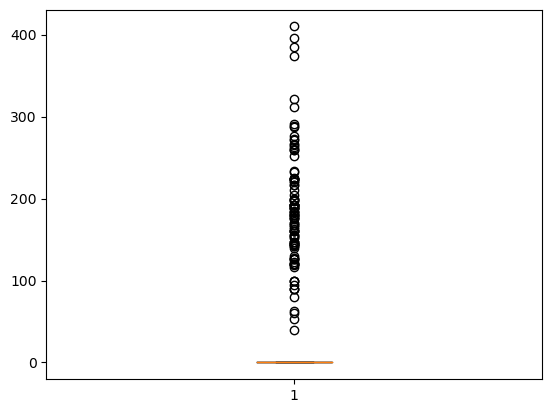

After Outlier removal


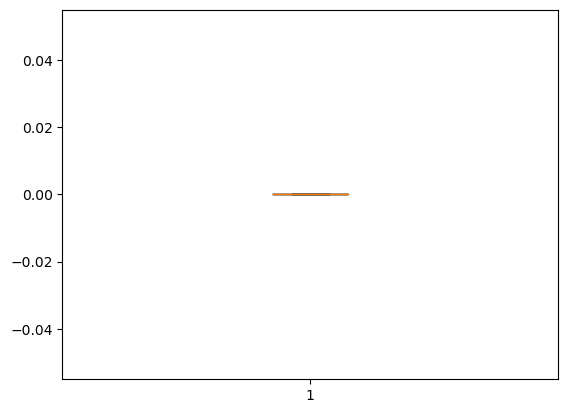

In [323]:
plt.boxplot(src_train_df['ScreenPorch'])
plt.show()
q1 = src_train_df['ScreenPorch'].quantile(0.1)
q3 = src_train_df['ScreenPorch'].quantile(0.9)
IQR = q3 - q1
src_train_df = src_train_df[(src_train_df['ScreenPorch'] >= q1 - 1.5*IQR) & 
                      (src_train_df['ScreenPorch'] <= q3 + 1.5*IQR)]
src_train_df.shape
print('After Outlier removal')
plt.boxplot(src_train_df['ScreenPorch'])
plt.show()

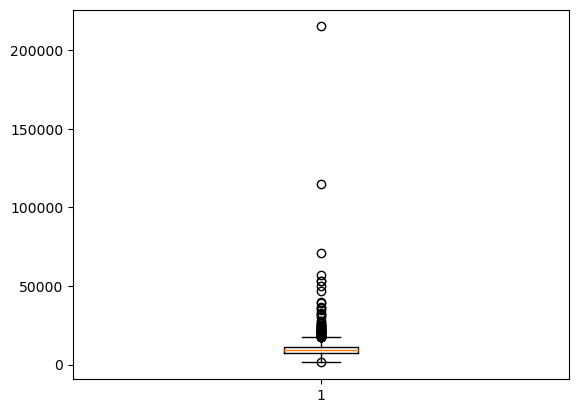

After Outlier removal


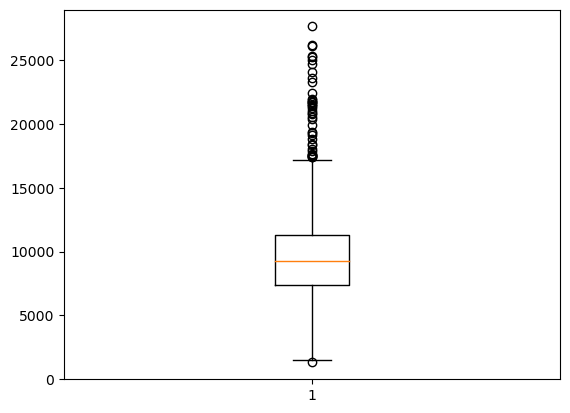

In [324]:
plt.boxplot(src_train_df['LotArea'])
plt.show()
q1 = src_train_df['LotArea'].quantile(0.1)
q3 = src_train_df['LotArea'].quantile(0.9)
IQR = q3 - q1
src_train_df = src_train_df[(src_train_df['LotArea'] >= q1 - 1.5*IQR) & 
                      (src_train_df['LotArea'] <= q3 + 1.5*IQR)]
src_train_df.shape
print('After Outlier removal')
plt.boxplot(src_train_df['LotArea'])
plt.show()

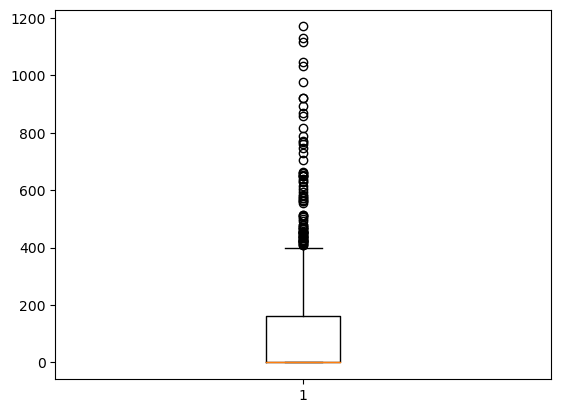

After Outlier removal


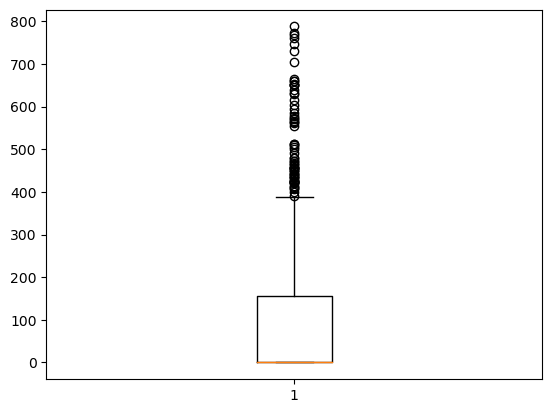

In [325]:
plt.boxplot(src_train_df['MasVnrArea'])
plt.show()
q1 = src_train_df['MasVnrArea'].quantile(0.1)
q3 = src_train_df['MasVnrArea'].quantile(0.9)
IQR = q3 - q1
src_train_df = src_train_df[(src_train_df['MasVnrArea'] >= q1 - 1.5*IQR) & 
                      (src_train_df['MasVnrArea'] <= q3 + 1.5*IQR)]
src_train_df.shape
print('After Outlier removal')
plt.boxplot(src_train_df['MasVnrArea'])
plt.show()

In [326]:
src_train_df[src_train_df_numerical_columns.columns.to_list()].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.0,1262.0,1262.0,1262.000000,1262.000000,1262.000000
mean,57.492076,68.946910,9460.389857,6.071315,5.548336,1972.012678,1985.313788,91.709984,418.272583,42.128368,575.697306,1036.098257,1140.599842,340.250396,5.588748,1486.438986,0.411252,0.052298,1.567353,0.373217,2.857369,1.049128,6.480190,0.557052,1979.357369,1.750396,466.270998,92.365293,45.954834,22.947702,3.690967,0.0,0.0,0.0,6.326466,2007.797147,176531.960380
std,42.819332,20.953736,3789.913003,1.366177,1.101708,30.681834,20.801653,149.405005,420.681156,151.526950,446.675092,406.700912,364.941679,426.439802,47.332019,485.434773,0.511222,0.229726,0.538579,0.498383,0.809503,0.226958,1.603675,0.610113,24.105074,0.757921,213.067910,119.787376,63.572537,61.354475,30.217287,0.0,0.0,0.0,2.692471,1.325666,72772.529354
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7342.500000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,218.250000,789.500000,864.000000,0.000000,0.000000,1121.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,312.750000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.000000,2007.000000,128000.000000
50%,50.000000,69.000000,9202.000000,6.000000,5.000000,1975.000000,1995.000000,0.000000,355.000000,0.000000,489.000000,975.500000,1067.500000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1980.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,0.0,0.0,0.0,6.000000,2008.000000,159217.000000
75%,70.000000,78.000000,11275.000000,7.000000,6.000000,2002.000000,2004.000000,155.500000,696.750000,0.000000,817.500000,1270.500000,1362.000000,723.750000,0.000000,1755.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.0,0.0,0.0,8.000000,2009.000000,210750.000000
90%,120.000000,90.000000,13753.200000,8.000000,7.000000,2006.000000,2007.000000,305.900000,1013.900000,64.000000,1256.500000,1580.000000,1656.000000,929.900000,0.000000,2112.900000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,750.000000,252.000000,130.000000,113.800000,0.000000,0.0,0.0,0.0,10.000000,2010.000000,273800.000000
95%,160.000000,100.000000,16054.850000,8.000000,8.000000,2007.000000,2007.000000,419.750000,1219.900000,374.950000,1481.900000,1728.000000,1791.800000,1120.950000,0.000000,2397.700000,1.000000,0.950000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,841.900000,321.950000,168.950000,183.950000,0.000000,0.0,0.0,0.0,11.000000,2010.000000,320000.000000
99%,190.000000,130.000000,21797.580000,9.000000,9.000000,2009.000000,2009.000000,650.000000,1466.340000,716.900000,1784.020000,2057.700000,2121.680000,1337.850000,283.140000,2869.560000,1.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.0000

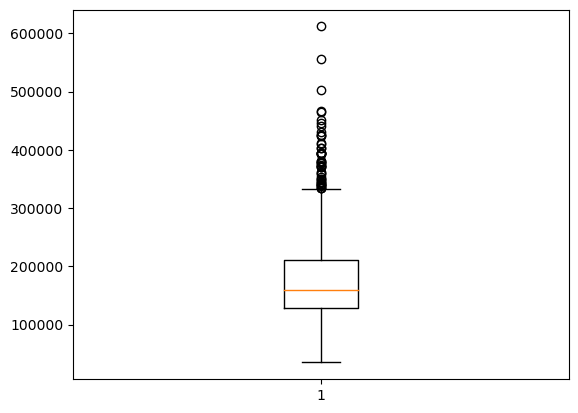

After Outlier removal


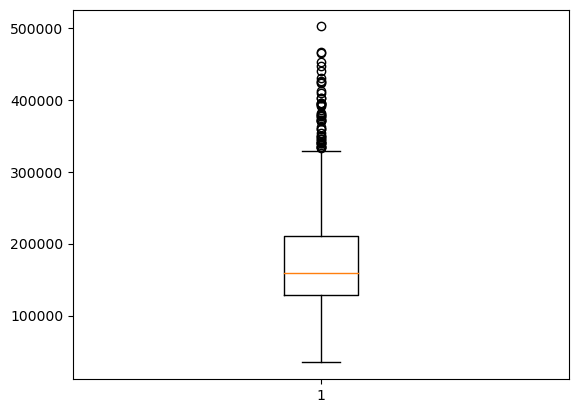

In [327]:
plt.boxplot(src_train_df['SalePrice'])
plt.show()
q1 = src_train_df['SalePrice'].quantile(0.1)
q3 = src_train_df['SalePrice'].quantile(0.9)
IQR = q3 - q1
src_train_df = src_train_df[(src_train_df['SalePrice'] >= q1 - 1.5*IQR) & 
                      (src_train_df['SalePrice'] <= q3 + 1.5*IQR)]
src_train_df.shape
print('After Outlier removal')
plt.boxplot(src_train_df['SalePrice'])
plt.show()

In [328]:
corr = src_train_df.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.392818,-0.399841,0.030396,-0.057920,0.019968,0.031368,0.025990,-0.087413,-0.060876,-0.134808,-0.261680,-0.269266,0.318013,0.048040,0.083095,0.009601,-0.019057,0.130712,0.187143,-0.022488,0.282747,0.044331,-0.038471,0.078951,-0.052941,-0.117229,-0.031867,0.000964,-0.011218,-0.049040,NaN,NaN,NaN,-0.027837,-0.014769,-0.100368
LotFrontage,-0.392818,1.000000,0.571357,0.214122,-0.048341,0.126451,0.092323,0.150697,0.110901,0.033889,0.139991,0.281546,0.356146,0.044747,0.017989,0.308389,0.050352,-0.018477,0.178072,0.037407,0.253652,0.006613,0.306024,0.202401,0.075645,0.274001,0.298585,0.086694,0.104888,-0.008925,0.072683,NaN,NaN,NaN,0.049106,0.018149,0.348865
LotArea,-0.399841,0.571357,1.000000,0.190943,-0.022949,0.069175,0.049399,0.121820,0.163234,0.064946,0.098109,0.301131,0.406709,0.096021,-0.001335,0.389635,0.082555,0.023946,0.192113,0.081971,0.282359,-0.009323,0.357963,0.295759,0.023041,0.274425,0.315659,0.153050,0.125146,-0.002259,0.086873,NaN,NaN,NaN,0.027792,-0.019077,0.395210
OverallQual,0.030396,0.214122,0.190943,1.000000,-0.092631,0.582476,0.559521,0.391814,0.198012,-0.084597,0.314602,0.519524,0.453315,0.275145,-0.067997,0.576000,0.099757,-0.051738,0.562569,0.263038,0.111691,-0.190306,0.410304,0.396612,0.526344,0.605593,0.567146,0.267852,0.319284,-0.125647,0.044354,NaN,NaN,NaN,0.085394,-0.014500,0.810383
OverallCond,-0.057920,-0.048341,-0.022949,-0.092631,1.000000,-0.371823,0.068621,-0.114240,-0.024755,0.063543,-0.154036,-0.171466,-0.137936,0.018550,0.009681,-0.086173,-0.045790,0.155928,-0.211301,-0.045674,0.000763,-0.079469,-0.066562,-0.028916,-0.305712,-0.183635,-0.141224,0.010953,-0.030999,0.097300,0.036211,NaN,NaN,NaN,0.000971,0.044395,-0.086945
YearBuilt,0.019968,0.126451,0.069175,0.582476,-0.371823,1.000000,0.605392,0.315163,0.242751,-0.057843,0.160197,0.405679,0.284147,0.000393,-0.170862,0.196772,0.180731,-0.041693,0.484751,0.233708,-0.053082,-0.186210,0.086956,0.173785,0.782141,0.544898,0.492040,0.234072,0.196453,-0.416414,0.025980,NaN,NaN,NaN,0.020623,-0.014156,0.569876
YearRemodAdd,0.031368,0.092323,0.049399,0.559521,0.068621,0.605392,1.000000,0.178020,0.116813,-0.074280,0.185399,0.297132,0.235581,0.125100,-0.068174,0.280350,0.124462,-0.020321,0.449301,0.187419,-0.030867,-0.160779,0.175826,0.115774,0.636469,0.431052,0.385263,0.218568,0.254665,-0.210692,0.043984,NaN,NaN,NaN,0.032873,0.035848,0.544356
MasVnrArea,0.025990,0.150697,0.121820,0.391814,-0.114240,0.315163,0.178020,1.000000,0.216772,-0.059567,0.121408,0.335449,0.322692,0.120417,-0.072641,0.341133,0.092802,-0.002837,0.255336,0.173708,0.081397,-0.020526,0.259322,0.233742,0.247029,0.365414,0.366019,0.192018,0.121714,-0.110823,0.041980,NaN,NaN,NaN,0.031105,0.011524,0.453788
BsmtFinSF1,-0.087413,0.110901,0.163234,0.198012,-0.024755,0.242751,0.116813,0.216772,1.000000,-0.059195,-0.526597,0.431100,0.356662,-0.191286,-0.066136,0.092429,0.657465,0.045659,0.031659,-0.012749,-0.104293,-0.095232,-0.009424,0.208092,0.146876,0.202813,0.250758,0.205630,0.082723,-0.124445,0.034419,NaN,NaN,NaN,0.010409,0.035158,0.387586
BsmtFinSF2,-0.060876,0.033889,0.064946,-0.084597,0.063543,-0.057843,-0.074280,-0.059567,-0.059195,1.000000,-0.214689,0.077187,0.069166,-0.086457,0.021776,-0.022208,0.141659,0.076055,-0.070177,-0.050709,-0.003585,-0.040937,-0.040088,0.022009,-0.089538,-0.057524,-0.022511,0.079058,-0.021435,0.051422,-0.029755,NaN,NaN,NaN,-0.012721,0.025306,-0.038209


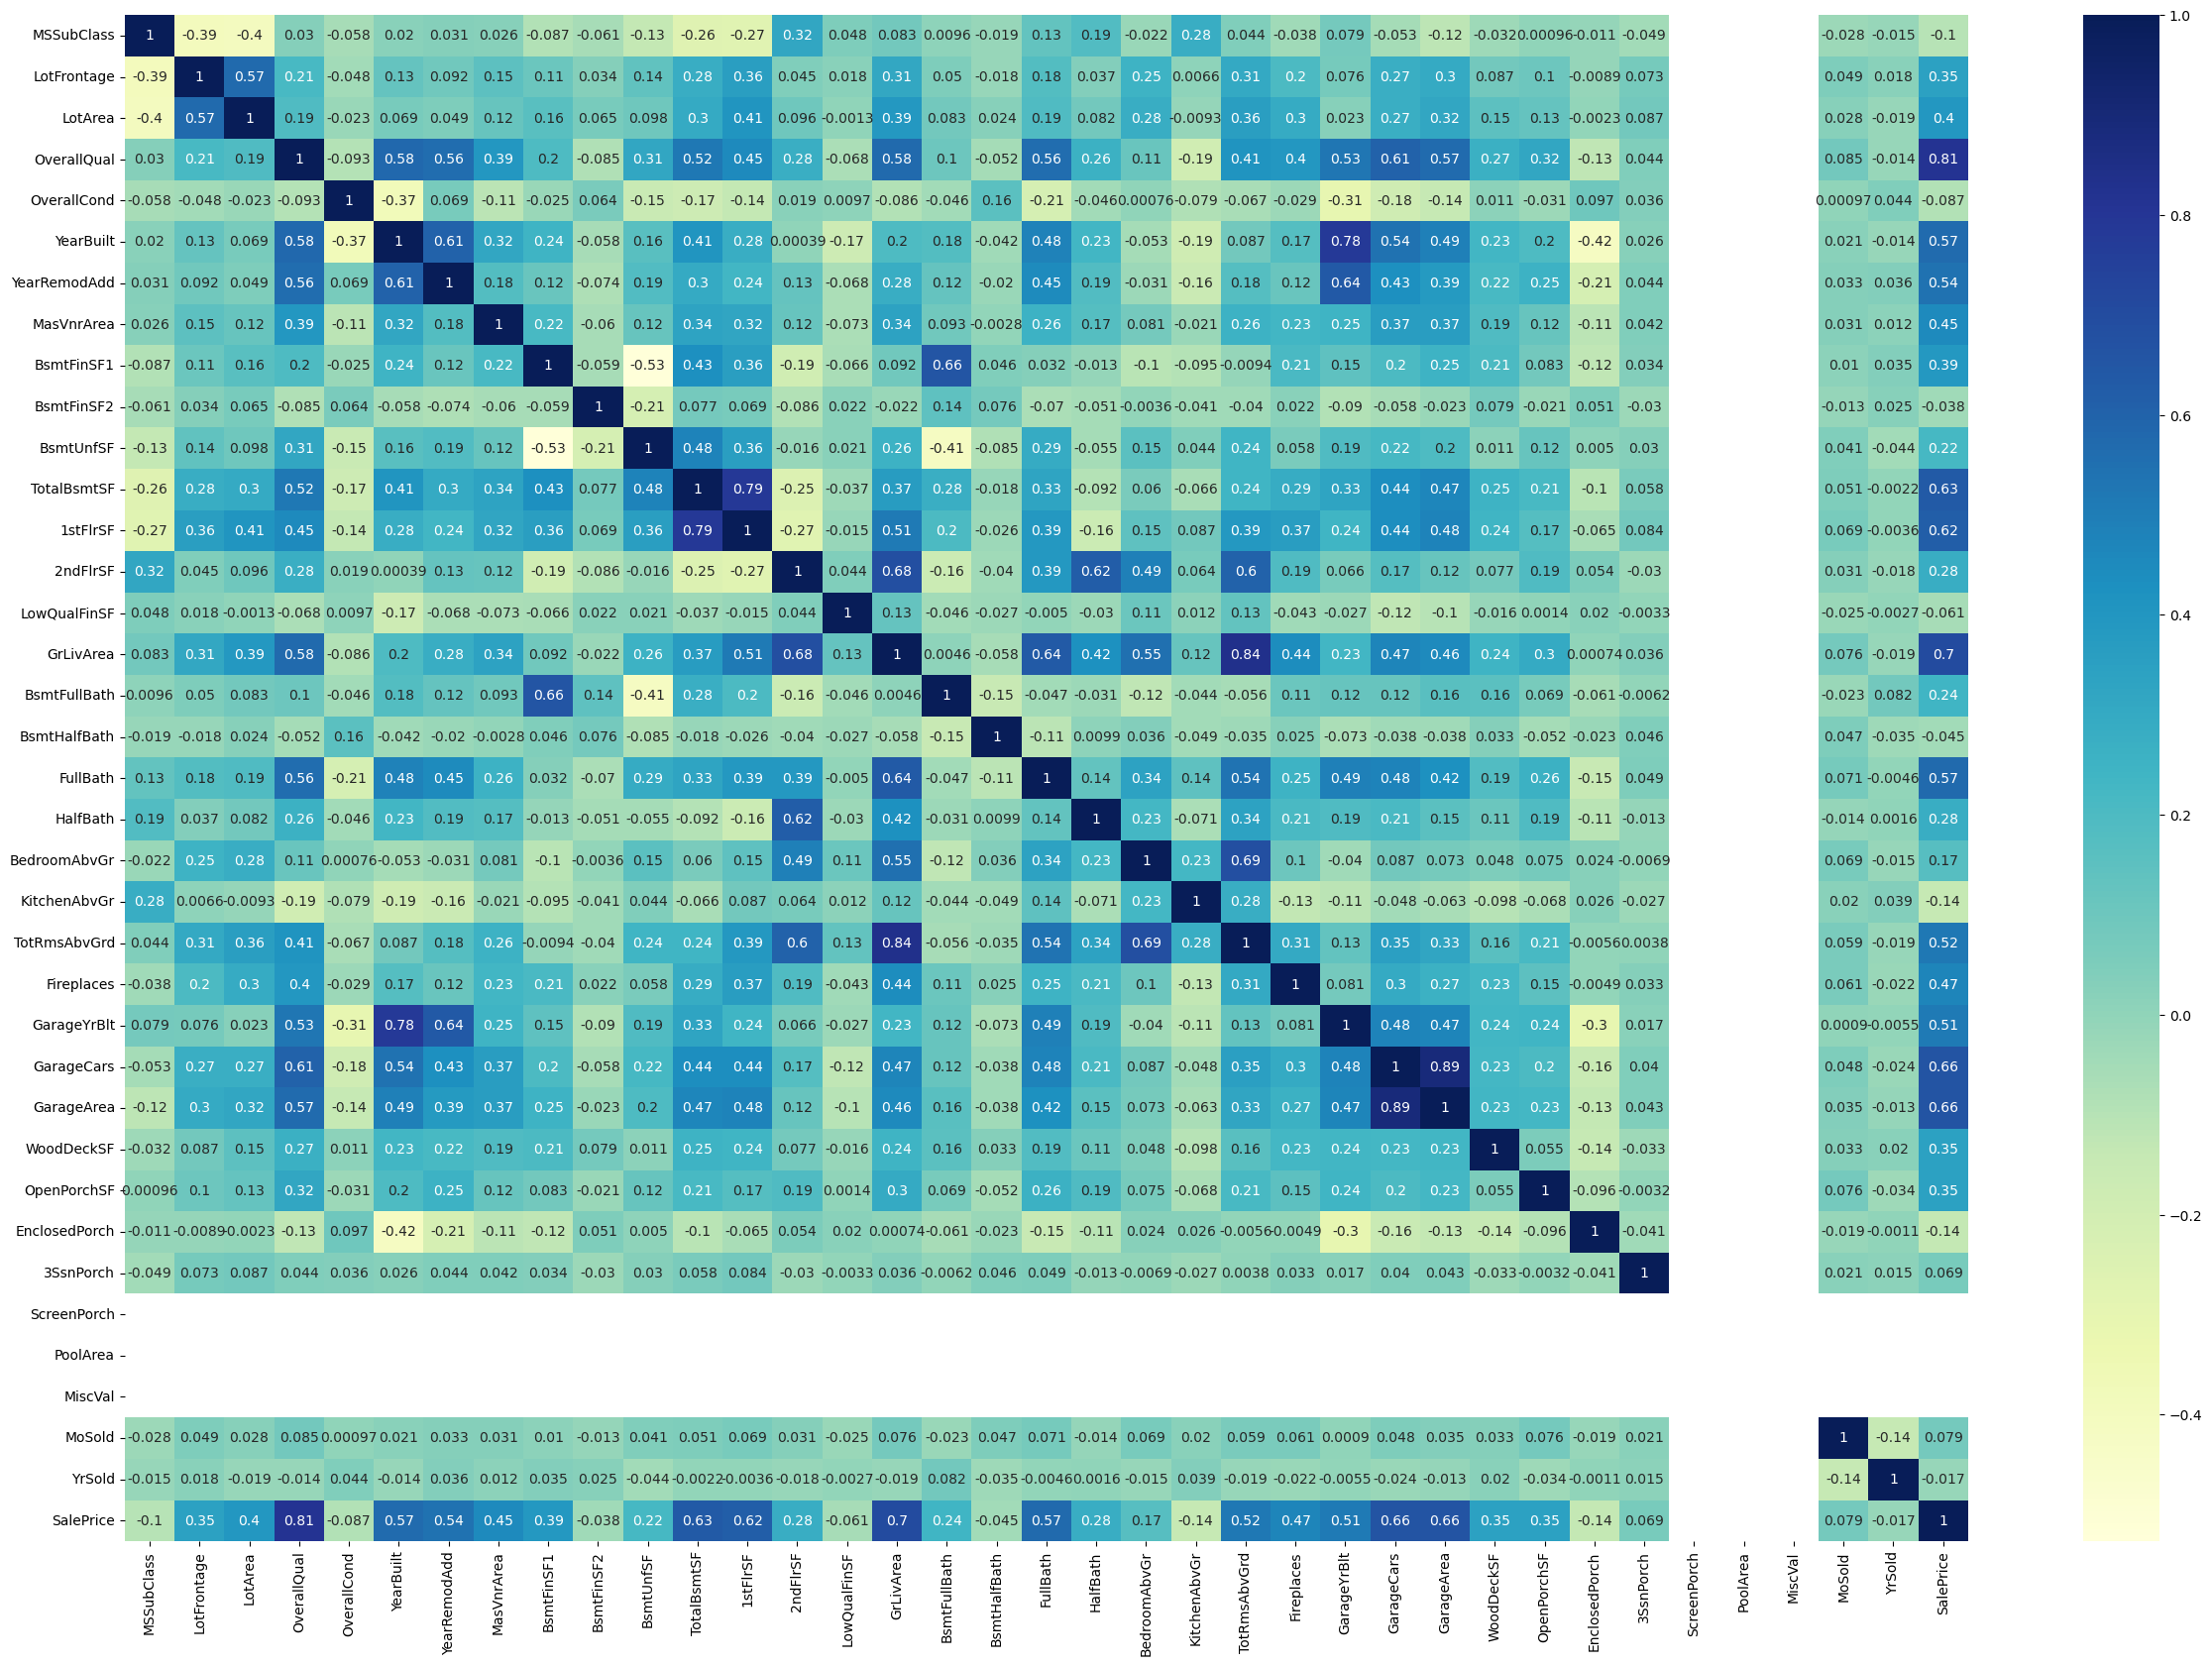

In [329]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.show()

### Generating dummy Variables 

In [330]:
categorical_columns = src_train_df.select_dtypes(include='object').columns
print(f'Categorical columns :{categorical_column}')

Categorical columns :['FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical']


In [331]:
print(src_train_df.shape)
source_data = pd.get_dummies(src_train_df, drop_first=True )
print(source_data.shape)

(1260, 76)
(1260, 230)


In [332]:
source_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0

In [333]:
#fetch the target variable
y = source_data.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [334]:
X = source_data
X.shape

(1260, 229)

### Split Test and Train data 

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=50)

In [336]:
print(f'X_train.shape :{X_train.shape}')
print(f'X_test.shape :{X_test.shape}')
print(f'y_train.shape :{y_train.shape}')
print(f'y_test.shape :{y_test.shape}')


X_train.shape :(882, 229)
X_test.shape :(378, 229)
y_train.shape :(882,)
y_test.shape :(378,)


In [337]:
num_column = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

In [338]:
X_train[num_column].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.0,882.0,882.0,882.000000,882.000000
mean,56.723356,68.867347,9559.253968,6.049887,5.560091,1971.351474,1985.195011,91.315193,416.724490,39.360544,579.302721,1035.387755,1140.878685,340.128118,5.597506,1486.604308,0.409297,0.057823,1.561224,0.379819,2.844671,1.051020,6.469388,0.535147,1978.874150,1.749433,461.581633,95.345805,45.929705,23.445578,3.892290,0.0,0.0,0.0,6.321995,2007.774376
std,41.991168,21.429278,3878.891599,1.355112,1.102734,31.155591,20.878451,148.959495,423.877143,147.122469,446.577204,404.732034,371.600447,423.337052,47.859235,480.432442,0.510106,0.243067,0.538204,0.503969,0.804161,0.235123,1.574367,0.604007,24.498396,0.763546,213.501506,122.969869,65.772211,62.440236,29.401846,0.0,0.0,0.0,2.729282,1.320450
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,2006.000000
25%,20.000000,60.000000,7424.500000,5.000000,5.000000,1952.000000,1967.250000,0.000000,0.000000,0.000000,237.250000,780.000000,864.000000,0.000000,0.000000,1122.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,4.000000,2007.000000
50%,50.000000,69.000000,9240.500000,6.000000,5.000000,1974.000000,1994.000000,0.000000,351.500000,0.000000,499.500000,978.500000,1065.000000,0.000000,0.000000,1449.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1980.000000,2.000000,470.000000,0.000000,24.000000,0.000000,0.000000,0.0,0.0,0.0,6.000000,2008.000000
75%,70.000000,78.000000,11423.000000,7.000000,6.000000,2002.000000,2004.000000,148.750000,699.750000,0.000000,831.750000,1265.000000,1352.000000,726.000000,0.000000,1766.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.0,0.0,0.0,8.000000,2009.000000
max,190.000000,313.000000,27650.000000,10.000000,9.000000,2010.000000,2010.000000,772.000000,1904.000000,1474.000000,2153.000000,3200.000000,3228.000000,1818.000000,528.000000,3493.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,523.000000,386.000000,407.000000,0.0,0.0,0.0,12.000000,2010.000000


In [339]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train[num_column]=scaler.fit_transform(X_train[num_column])
X_test[num_column]=scaler.transform(X_test[num_column])


In [340]:
X_train[num_column].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.0,882.0,882.0,882.000000,882.000000
mean,0.216020,0.163929,0.313444,0.561099,0.570011,0.719938,0.586584,0.118284,0.218868,0.026703,0.269068,0.323559,0.251928,0.187089,0.010601,0.343242,0.204649,0.028912,0.520408,0.189909,0.474112,0.350340,0.385488,0.178382,0.700713,0.437358,0.332073,0.129546,0.087820,0.060740,0.009563,0.0,0.0,0.0,0.483818,0.443594
std,0.247007,0.073388,0.147207,0.150568,0.137842,0.225765,0.347974,0.192953,0.222625,0.099812,0.207421,0.126479,0.133190,0.232859,0.090642,0.157261,0.255053,0.121534,0.179401,0.251985,0.134027,0.078374,0.174930,0.201336,0.235562,0.190886,0.153598,0.167079,0.125759,0.161762,0.072240,0.0,0.0,0.0,0.248117,0.330112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.133562,0.232429,0.444444,0.500000,0.579710,0.287500,0.000000,0.000000,0.000000,0.110195,0.243750,0.152688,0.000000,0.000000,0.223977,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333,0.222222,0.000000,0.548077,0.250000,0.224460,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.272727,0.250000
50%,0.176471,0.164384,0.301347,0.555556,0.500000,0.739130,0.733333,0.000000,0.184611,0.000000,0.232002,0.305781,0.224731,0.000000,0.000000,0.330933,0.000000,0.000000,0.666667,0.000000,0.500000,0.333333,0.333333,0.000000,0.711538,0.500000,0.338129,0.000000,0.045889,0.000000,0.000000,0.0,0.0,0.0,0.454545,0.500000
75%,0.294118,0.195205,0.384175,0.666667,0.625000,0.942029,0.900000,0.192681,0.367516,0.000000,0.386321,0.395313,0.327599,0.399340,0.000000,0.434943,0.500000,0.000000,0.666667,0.500000,0.500000,0.333333,0.444444,0.333333,0.923077,0.500000,0.414388,0.228261,0.130019,0.000000,0.000000,0.0,0.0,0.0,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


### Model Building and Evaluation

In [341]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [342]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 4.0}
-14937.976440472636


In [343]:
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.32857738e+04,  3.30997986e+03,  2.45476514e+04,  4.60877256e+04,
        2.35918933e+04,  1.94449612e+04,  1.24339455e+04,  2.28074436e+04,
        3.69901518e+04,  1.11406599e+04,  1.22761680e+04,  3.54003660e+04,
        4.55652902e+04,  2.89552766e+04, -5.90255418e+03,  5.78236674e+04,
        8.74454915e+03, -1.45502881e+03,  1.20378704e+04,  9.24649421e+03,
       -1.02452381e+04, -1.17254706e+04,  1.82656586e+04,  1.46504118e+04,
       -1.85392547e+03,  1.73309195e+04,  1.83543560e+04,  1.06034518e+04,
        1.07769558e+04,  8.06543973e+03,  8.89998313e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.05326894e+03, -2.80904461e+03,
        4.20946791e+03,  3.61301917e+03,  5.87356762e+03,  6.52702373e+02,
       -3.11646371e+03,  4.98547607e+03, -1.10492570e+02,  1.49349638e+02,
        1.57884221e+03, -7.63033779e+03,  2.28157582e+03,  8.51496956e+03,
       -8.73320280e+03, -8.07266442e+03, -1.16703199e+03,  9.78977834e+03,
       -5.56871204e+03,  

In [344]:
# R2 calculation

y_pred_train = ridge.predict(X_train)
y_pred_test =  ridge.predict(X_test)

In [345]:
rdige_metric = []

r2_train = r2_score(y_train, y_pred_train)
print(r2_train)
rdige_metric.append(r2_train)

0.9464520480727279


In [346]:
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)
rdige_metric.append(r2_test)

0.9029361741425207


In [347]:
rss1 = np.sum(np.square(y_train - y_pred_train))
print(rss1)
rdige_metric.append(rss1)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
rdige_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
rdige_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
rdige_metric.append(mse_test_lr**0.5)

244664816643.5202
172210324818.48605
277397751.2965082
455582869.89017475


### Lasso

In [348]:
lasso = Lasso()

# cross validation
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [349]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 100}
-14490.450952984062


In [350]:
#Optimum Value of alpha is 100

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [351]:
lasso.coef_

array([-1.61468475e+04,  0.00000000e+00,  2.56753097e+04,  6.82148579e+04,
        3.04098381e+04,  3.31088132e+04,  1.23026802e+04,  2.12625671e+04,
        3.01265653e+04,  0.00000000e+00,  0.00000000e+00,  4.13075701e+04,
        3.22430437e+03,  0.00000000e+00, -1.04387820e+04,  1.61354560e+05,
        7.39598168e+03, -0.00000000e+00,  0.00000000e+00,  2.68542934e+03,
       -9.98099323e+03, -0.00000000e+00,  0.00000000e+00,  1.05952012e+04,
        0.00000000e+00,  1.69287783e+04,  1.29650061e+04,  6.61414734e+03,
        5.88549729e+03,  3.36636859e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.32552331e+03, -2.42669976e+02,
        0.00000000e+00,  0.00000000e+00,  4.51956374e+03, -1.76154390e+03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.02013210e+03,  6.15737677e+02,  8.66766311e+03,
       -2.75152464e+03, -0.00000000e+00, -0.00000000e+00,  3.24636927e+03,
       -0.00000000e+00,  

In [352]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metric.append(mse_test_lr**0.5)

0.9414126607485082
0.9061679690665685
267690174874.78296
166476484752.93774
303503599.6312732
440413980.82787764


In [353]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(rdige_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.464520e-01,9.414127e-01
1,R2 Score (Test),9.029362e-01,9.061680e-01
2,RSS (Train),2.446648e+11,2.676902e+11
3,RSS (Test),1.722103e+11,1.664765e+11
4,MSE (Train),1.665526e+04,1.742135e+04
5,MSE (Test),2.134439e+04,2.098604e+04


- Test R2 Score for Ridge Regression reduced from .94 to .902
- Test R2 Score for Lasso Regression reduced from .94 to .906


Let's check the coefficent changes 


In [354]:
variable_coeff = pd.DataFrame(index=X_test.columns)
variable_coeff.rows = X.columns
variable_coeff

""
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2


In [355]:
variable_coeff['Ridge'] = ridge.coef_
variable_coeff['Lasso'] = lasso.coef_
variable_coeff

,Ridge,Lasso
MSSubClass,-13285.773812,-16146.847489
LotFrontage,3309.979863,0.000000
LotArea,24547.651358,25675.309711
OverallQual,46087.725642,68214.857885
OverallCond,23591.893319,30409.838091
YearBuilt,19444.961233,33108.813179
YearRemodAdd,12433.945485,12302.680172
MasVnrArea,22807.443595,21262.567070
BsmtFinSF1,36990.151755,30126.565310
BsmtFinSF2,11140.659905,0.000000


In [356]:
variable_coeff['Ridge'].sort_values(ascending=False)[:10].index

Index(['GrLivArea', 'OverallQual', '1stFlrSF', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'Neighborhood_StoneBr', 'LotArea', 'OverallCond', 'Neighborhood_NoRidge'], dtype='object')

In [357]:
variable_coeff['Lasso'].sort_values(ascending=False)[:10].index

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'OverallCond', 'BsmtFinSF1', 'Neighborhood_StoneBr', 'LotArea', 'Neighborhood_NoRidge', 'MasVnrArea'], dtype='object')

- GrLivArea
- OverallQual
- OverallCond
- YearBuilt
- Neighborhood_StoneBr
- Exterior1st_BrkFace
- TotalBsmtSF
- LotArea

Q2 : How well those variables describe the price of a house

 These vraibles have a linear mapping with the sales price 
 

In [358]:
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.464520e-01,9.414127e-01
1,R2 Score (Test),9.029362e-01,9.061680e-01
2,RSS (Train),2.446648e+11,2.676902e+11
3,RSS (Test),1.722103e+11,1.664765e+11
4,MSE (Train),1.665526e+04,1.742135e+04
5,MSE (Test),2.134439e+04,2.098604e+04


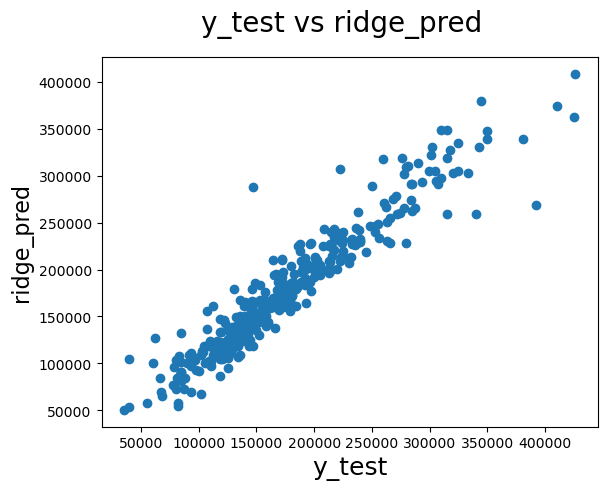

In [359]:
ridge_pred = ridge.predict(X_test)
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

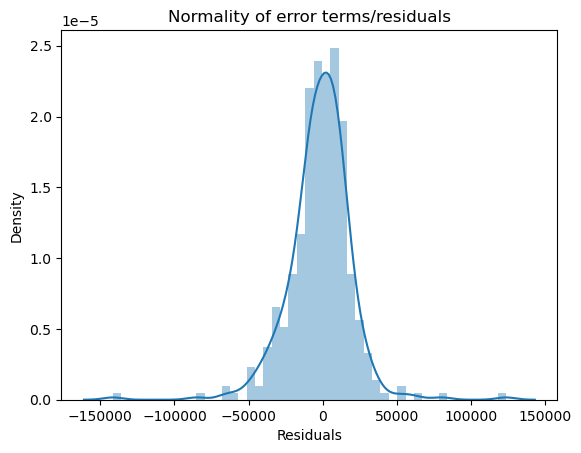

In [360]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [361]:
lasso_pred = lasso.predict(X_test)

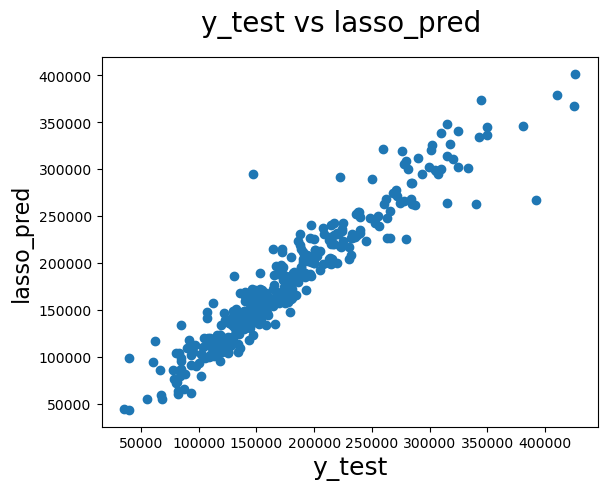

In [362]:
# Plotting y_test and y_pred to observe the spread of lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

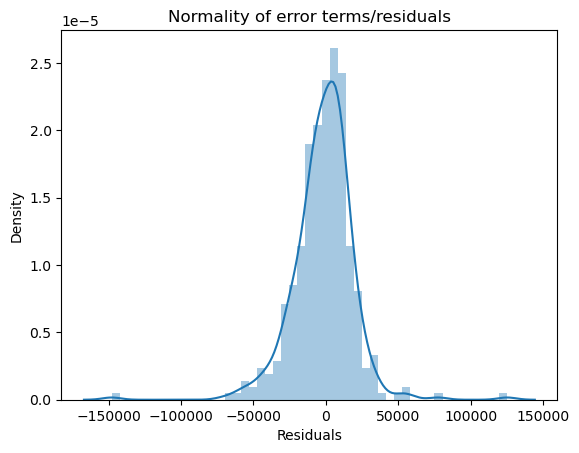

In [363]:
y_res=y_test-lasso_pred
# Plotting the distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

Question : determine the optimal value of lambda for ridge and lasso regression
- Lasso : 100
- Ridge : 4.0

What will be the changes in the model if we choose double the value of alpha for both ridge and lasso

In [364]:
alpha = 8
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)

Ridge(alpha=8)

In [365]:

y_pred_train = ridge2.predict(X_train)
y_pred_test =  ridge2.predict(X_test)

rdige_metric2 = []

r2_train = r2_score(y_train, y_pred_train)
print(r2_train)
rdige_metric2.append(r2_train)


r2_test = r2_score(y_test, y_pred_test)
print(r2_test)
rdige_metric2.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print(rss1)
rdige_metric2.append(rss1)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
rdige_metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
rdige_metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
rdige_metric2.append(mse_test_lr**0.5)

0.9396318482305697
0.90254194179256
275826847753.8817
172909770574.31647
312728852.32866406
457433255.4876097


In [366]:
#Optimum Value of alpha is 200

alpha =200

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train)


y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

lasso_metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metric2.append(mse_test_lr**0.5)

0.9321577293820309
0.9026620641667991
309976686390.72144
172696649847.79532
351447490.2389132
456869444.04178655


In [367]:
double_alpha_df = pd.DataFrame(index=X_train.columns)
double_alpha_df.rows = X_train.columns
double_alpha_df['Ridge2'] = ridge2.coef_
double_alpha_df['Ridge'] = ridge.coef_
double_alpha_df['Lasso'] = lasso.coef_
double_alpha_df['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
double_alpha_df.head(10)

,Ridge2,Ridge,Lasso,Lasso2
MSSubClass,-12842.164103,-13285.773812,-16146.847489,-15254.800812
LotFrontage,4236.131536,3309.979863,0.000000,0.000000
LotArea,22123.278264,24547.651358,25675.309711,22294.656850
OverallQual,40122.010640,46087.725642,68214.857885,75192.519022
OverallCond,18337.082587,23591.893319,30409.838091,21601.595049
YearBuilt,12878.543253,19444.961233,33108.813179,23776.159062
YearRemodAdd,13913.631905,12433.945485,12302.680172,14794.908882
MasVnrArea,22179.762767,22807.443595,21262.567070,20094.899507
BsmtFinSF1,32665.175557,36990.151755,30126.565310,29906.492517
BsmtFinSF2,7409.439242,11140.659905,0.000000,0.000000


#most important predictor variables

- OverallQual
- OverallCond
- YearBuilt
- Neighborhood_StoneBr
- Exterior1st_BrkFace
- TotalBsmtSF
- LotArea

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [368]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=229)

In [369]:
X_train_new = X_train.drop(columns=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF'],axis=1)
X_train_new.head(10)

,MSSubClass,LotFrontage,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
546,0.176471,0.167808,0.000000,0.000000,0.157563,0.0,0.355318,0.170968,0.396040,0.0,0.391817,0.0,0.0,0.333333,0.5,0.500000,0.333333,0.333333,0.333333,0.423077,0.50,0.316547,0.000000,0.072658,0.0,0.353808,0.0,0.0,0.0,0.363636,0.25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1

In [370]:
X_test_new = X_test.drop(columns=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF'],axis=1)
X_test_new.head(10)

,MSSubClass,LotFrontage,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
299,0.000000,0.202055,0.900000,0.000000,0.000000,0.0,0.507199,0.255914,0.000000,0.0,0.233715,0.0,0.5,0.333333,0.0,0.500000,0.333333,0.333333,0.333333,0.423077,0.25,0.215827,0.000000,0.068834,0.000000,0.0,0.0,0.0,0.0,0.636364,0.75,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1

In [371]:
#Optimum Value of alpha is 100

alpha =100

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train_new, y_train)


y_pred_train = lasso3.predict(X_train_new)
y_pred_test = lasso3.predict(X_test_new)

lasso_metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metric3.append(mse_test_lr**0.5)

0.9329845031703407
0.8876962657717308
306199091729.4502
199248920789.2574
347164503.09461474
527113547.0615275


In [372]:
# R2 calculation
alpha = 4
ridge3 = Ridge(alpha=alpha)
ridge3.fit(X_train_new, y_train)
y_pred_train = ridge3.predict(X_train_new)
y_pred_test =  ridge3.predict(X_test_new)

rdige_metric3 = []

r2_train = r2_score(y_train, y_pred_train)
print(r2_train)
rdige_metric3.append(r2_train)


r2_test = r2_score(y_test, y_pred_test)
print(r2_test)
rdige_metric3.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print(rss1)
rdige_metric3.append(rss1)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
rdige_metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
rdige_metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
rdige_metric3.append(mse_test_lr**0.5)

0.9392498120919069
0.8912240118271967
277572401009.4768
192990005186.84802
314707937.652468
510555569.2773757


In [373]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(rdige_metric3, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric2, name = 'Lasso Regression')

final_metric2 = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric2

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.392498e-01,9.321577e-01
1,R2 Score (Test),8.912240e-01,9.026621e-01
2,RSS (Train),2.775724e+11,3.099767e+11
3,RSS (Test),1.929900e+11,1.726966e+11
4,MSE (Train),1.774001e+04,1.874693e+04
5,MSE (Test),2.259548e+04,2.137450e+04


In [374]:
#important predictor variables
betas = pd.DataFrame(index=X_train_new.columns)
betas.rows = X_train_new.columns
betas['Lasso3'] = lasso3.coef_
pd.set_option('display.max_rows', None)
betas.head(15)

,Lasso3
MSSubClass,-20379.893153
LotFrontage,0.000000
YearRemodAdd,18741.477607
MasVnrArea,24037.883483
BsmtFinSF1,46525.377176
BsmtFinSF2,6949.930108
BsmtUnfSF,18356.706123
1stFlrSF,17094.458522
2ndFlrSF,0.000000
LowQualFinSF,-17370.049670


#Below are the five most important predictor variables now after dropping five most important predictor variables in the lasso model and recreating the model

-LotFrontage
-MasVnrArea
-BsmtFinSF1
-GrLivArea
-YearRemodAdd
